In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

# Challenge 1 - clean the data

Import the data in ../data/economies_of_scale.csv into a pandas dataframe

In [2]:
import pandas as pd

# Load the data into a pandas DataFrame
df = pd.read_csv('../data/economies_of_scale.csv')

# Display basic information about the data
print("DataFrame shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())
print("\nBasic statistics:")
print(df.describe())
print("\nCheck for missing values:")
print(df.isnull().sum())

DataFrame shape: (95, 2)

First 5 rows:
   items_produced total_profit
0             899        111K$
1            2051       5953K$
2            1613        822K$
3            1347      -1269K$
4             462        313K$

Column names:
['items_produced', 'total_profit']

Basic statistics:
       items_produced
count       95.000000
mean      1064.052632
std        581.163586
min        161.000000
25%        517.500000
50%       1062.000000
75%       1592.000000
max       2081.000000

Check for missing values:
items_produced    0
total_profit      0
dtype: int64


Notice the column *total_profit* is in text. You first need to clean this data to turn it back into numeric data. You can consider using the method *apply* or *replace* to do this

In [5]:
# Remove currency symbols, commas, and convert to float
df['total_profit'] = df['total_profit'].replace({'[\$,]': '', '[^\d\.\-]': ''}, regex=True)
df['total_profit'] = pd.to_numeric(df['total_profit'], errors='coerce')

# # Or in one line:
df['total_profit'] = df['total_profit'].replace({'[\$,]': '', '[^\d\.\-]': ''}, regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\profe\AppData\Local\Temp\ipykernel_36208\1565570543.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['total_profit'] = df['total_profit'].replace({'[\$,]': '', '[^\d\.\-]': ''}, regex=True)
C:\Users\profe\AppData\Local\Temp\ipykernel_36208\1565570543.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['total_profit'] = df['total_profit'].replace({'[\$,]': '', '[^\d\.\-]': ''}, regex=True)
C:\Users\profe\AppData\Local\Temp\ipykernel_36208\1565570543.py:6: SyntaxWarning: invalid escape sequence '\$'
  df['total_profit'] = df['total_profit'].replace({'[\$,]': '', '[^\d\.\-]': ''

Now let's visualize how total profitability changes with number of machines sold 

In [11]:
print("Column names in DataFrame:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

Column names in DataFrame:
['items_produced', 'total_profit']

First few rows:
   items_produced  total_profit
0             899         111.0
1            2051        5953.0
2            1613         822.0
3            1347       -1269.0
4             462         313.0


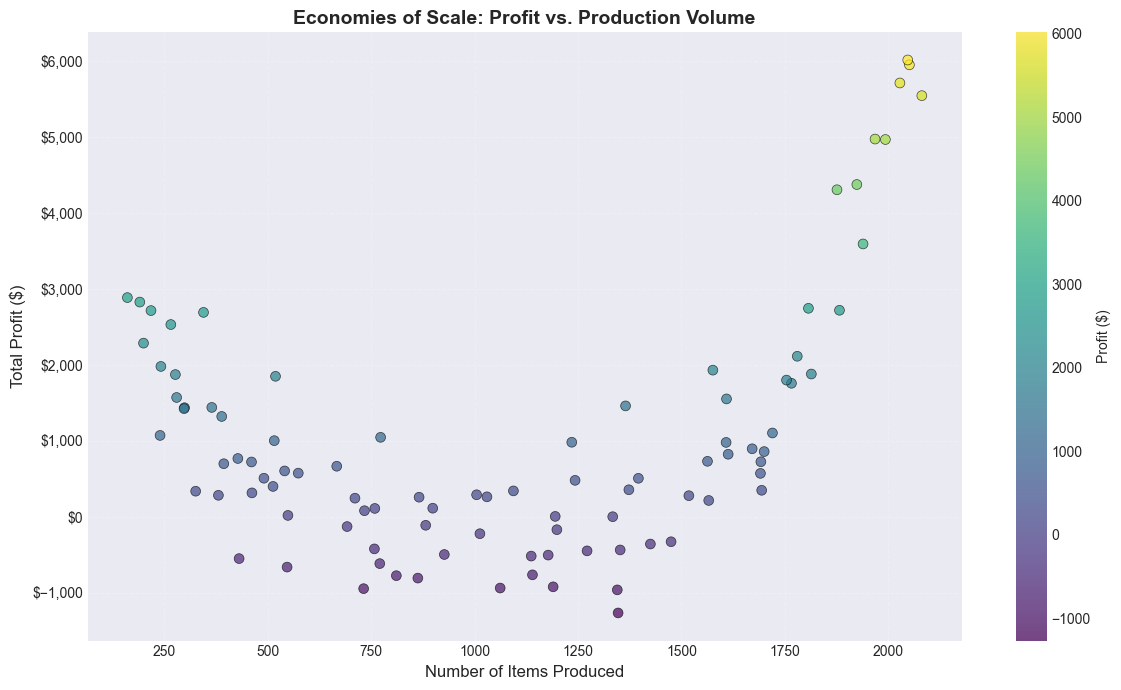

In [12]:
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 7))
scatter = plt.scatter(df['items_produced'], df['total_profit'],
                     c=df['total_profit'],  # Color by profit value
                     cmap='viridis',
                     s=50,  # Marker size
                     alpha=0.7,
                     edgecolor='black',
                     linewidth=0.5)

plt.colorbar(scatter, label='Profit ($)')
plt.xlabel('Number of Items Produced', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.title('Economies of Scale: Profit vs. Production Volume', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.2, linestyle='--')

# Format y-axis as currency
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()

This is an expected phenomenon called [*economies of scale*](https://en.wikipedia.org/wiki/Economies_of_scale): If you sell a very niche product (few sales) you can usuallyy charge a premium and have good profitability, since there will likely not be sufficient market for many competitors. As your product becomes more mainstream and more players enter the market, the supply pressures lower your profitability. Finally, once you break through to become a large player, as you expand your operations, your fixed costs become more and more diluted by the total number of items sold and your profitability increases again due to your lower operating costs.

In this exercise we are going to try to predict the profitability of the company based on the number of items sold.
Select your Features (X) and your Targets (y) and perform a test-train split.

In [13]:
from sklearn.model_selection import train_test_split

# Features (X): Number of items produced (indy variable)
X = df[['items_produced']]  # Keep as DataFrame for sklearn compatibility
# OR X = df['items_produced'].values.reshape(-1, 1)  # As numpy array

# Target (y): Total profit (what we want to predict)
y = df['total_profit']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures (first 5):\n{X.head()}")
print(f"\nTarget (first 5):\n{y.head()}")

Features shape: (95, 1)
Target shape: (95,)

Features (first 5):
   items_produced
0             899
1            2051
2            1613
3            1347
4             462

Target (first 5):
0     111.0
1    5953.0
2     822.0
3   -1269.0
4     313.0
Name: total_profit, dtype: float64


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing, 80% for training
    random_state=42,    # Set seed for reproducibility
    shuffle=True        # Shuffle data before splitting
)

print(f"Training set size: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing set size: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Training set size: 76 samples (80.0%)
Testing set size: 19 samples (20.0%)

X_train shape: (76, 1)
X_test shape: (19, 1)
y_train shape: (76,)
y_test shape: (19,)


# Degree 1

Let's first approach this problem with a simple linear regression

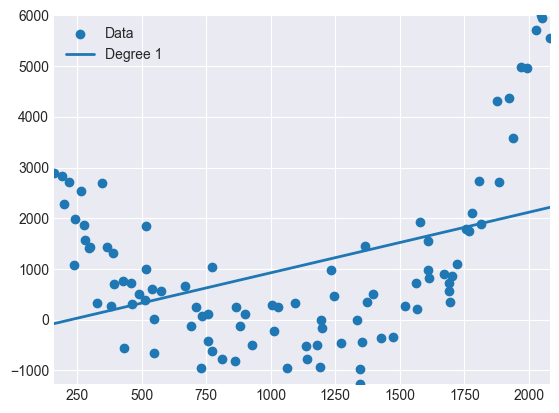

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_poly_train = scaler.fit_transform(X_train)
X_poly_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_poly_train, y_train)

y_train_pred = model.predict(X_poly_train)
y_test_pred = model.predict(X_poly_test)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

plt.scatter(X, y, label="Data")
X_plot = pd.DataFrame(np.linspace(100, 2200, 100).reshape(-1, 1), columns=['items_produced'])
y_plot = model.predict(scaler.transform(X_plot))
plt.plot(X_plot, y_plot, label="Degree 1", linewidth=2)
plt.xlim(X['items_produced'].min(), X['items_produced'].max())
plt.ylim(y.min(), y.max())
plt.legend()
plt.show()

We can easily see this is not a good model. It completely misses the niche side of the market and it does not approximate well  the profitability of the large players. This is a weak model with little generalization power.
This model exhibits *high bias*: the data DOES NOT fit well with the training data. It is however a nodel with *low variance*: the profit predicted  swings in expected ways with the sold units.
This is typical in cases of *Underfitting*.

# Degree 2

We are going to introdduce a common regression technique called *polynomial regression*. When you have a single feature $X$ and you apply a linear regression you are finding the optimal coefficientf for the formula

$$ y = \beta_0 + \beta_1 X $$

We are going to create new features by considering powers of the base feature $X$, so a *quadratic* regression would produce the optimal coefficients for the formula

$$y = \beta_0 + \beta_1 X + \beta_2 X^2$$

and a *cubic* regression would produce the optimal coefficients for the formula

$$y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3$$

and so on.

This way, with a single feature *X* you can produce multiple features $X^2$, $X^3$, etc to apply a higher dimensional Linear Regression. We create these extra features $X^2$, $X^3$ using a sklearn preprocessing tool called *PolynomialFeatures*

In [16]:
#polynomial features of degree 1 gives us a constant term plus the linear term 
from sklearn.preprocessing import PolynomialFeatures

X_example = [[1],[2],[3],[5]]
poly_features = PolynomialFeatures(degree=1)
poly_features.fit_transform(X_example)

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 5.]])

In [17]:
#polynomial features of degree 2 gives us a constant term plus the linear term, plus a quadratic term 
X_example = [[1],[2],[3],[5]]
poly_features = PolynomialFeatures(degree=2)
poly_features.fit_transform(X_example)

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  5., 25.]])

In [18]:
#polynomial features of degree 2 gives us a constant term plus the linear term, plus a cubic term 
X_example = [[1],[2],[3],[5]]
poly_features = PolynomialFeatures(degree=3)
poly_features.fit_transform(X_example)

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   5.,  25., 125.]])

And so on. So, if we want to use a quadratic approximation to this problem we run the following code

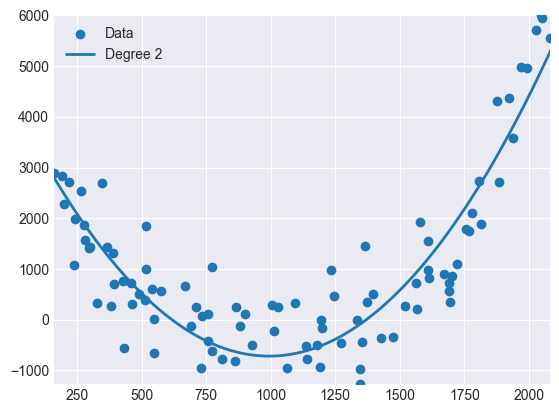

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

scaler = StandardScaler()
poly_features = PolynomialFeatures(degree=2)  # here is where the 2 comes in
X_poly_train = scaler.fit_transform(poly_features.fit_transform(X_train))
X_poly_test = scaler.transform(poly_features.transform(X_test))

model = LinearRegression()
model.fit(X_poly_train, y_train)

y_train_pred = model.predict(X_poly_train)
y_test_pred = model.predict(X_poly_test)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

plt.scatter(X, y, label="Data")
X_plot = pd.DataFrame(np.linspace(100, 2200, 100).reshape(-1, 1), columns=['items_produced'])
y_plot = model.predict(scaler.transform(poly_features.transform(X_plot)))
plt.plot(X_plot, y_plot, label="Degree 2", linewidth=2)
plt.xlim(X['items_produced'].min(), X['items_produced'].max())
plt.ylim(y.min(), y.max())
plt.legend()
plt.show()

You can see the fit obviously looks much better just by visual inspection. Let's keep it going...

# Challenge 2 -Degree 4

Replicate the exercise above but now for degree 4. Is the fit improving?

=== DEGREE 1 (Linear) ===
Training MSE: 2,413,863.71
Testing MSE: 2,286,152.70
Training R²: 0.1657
Testing R²: -0.1734

=== DEGREE 4 (Polynomial) ===
Original features: 1
Polynomial features (degree 4): 4
Feature names: ['items_produced' 'items_produced^2' 'items_produced^3' 'items_produced^4']
Training MSE: 382,344.07
Testing MSE: 281,263.49
Training R²: 0.8679
Testing R²: 0.8556

=== COMPARISON ===
MSE Improvement (Lower is better):
  Training: 84.2% improvement
  Testing: 87.7% improvement

R² Improvement (Higher is better):
  Training: 0.7022 increase
  Testing: 1.0291 increase


c:\Users\profe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\profe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\profe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


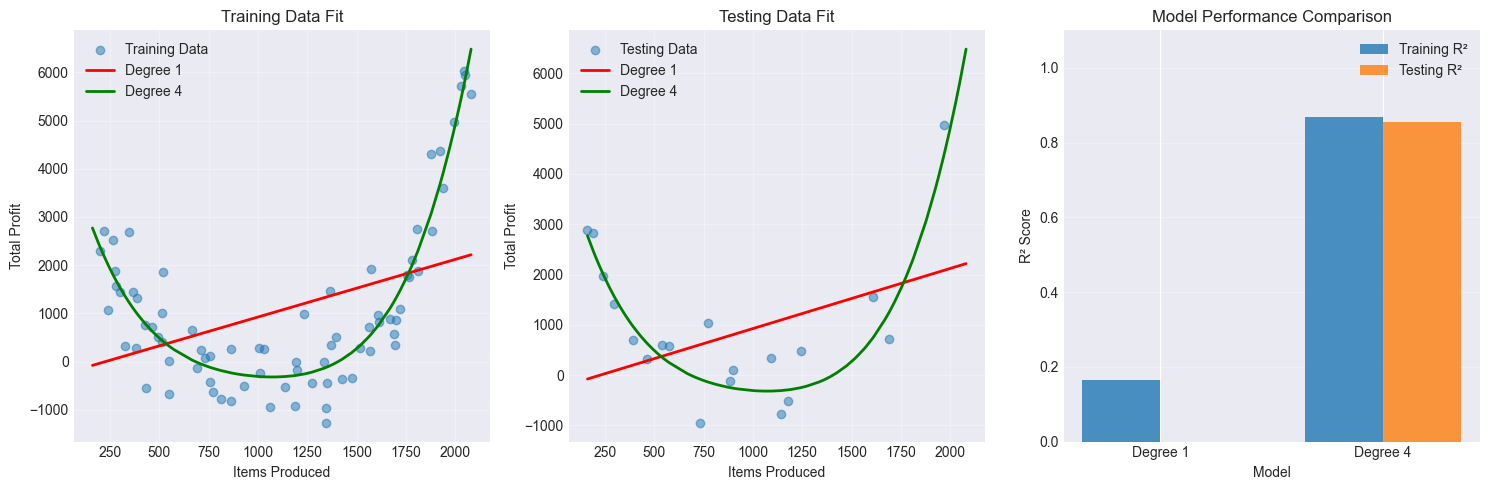


=== OVERFITTING ANALYSIS ===
Degree 1 Train-Test R² gap: 0.3391
Degree 4 Train-Test R² gap: 0.0122
✓ Degree 4 shows better generalization!


In [21]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# First, let's see how linear regression performs (degree 1)
print("=== DEGREE 1 (Linear) ===")
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Predictions
y_train_pred_linear = model_linear.predict(X_train)
y_test_pred_linear = model_linear.predict(X_test)

# Metrics
train_mse_linear = mean_squared_error(y_train, y_train_pred_linear)
test_mse_linear = mean_squared_error(y_test, y_test_pred_linear)
train_r2_linear = r2_score(y_train, y_train_pred_linear)
test_r2_linear = r2_score(y_test, y_test_pred_linear)

print(f"Training MSE: {train_mse_linear:,.2f}")
print(f"Testing MSE: {test_mse_linear:,.2f}")
print(f"Training R²: {train_r2_linear:.4f}")
print(f"Testing R²: {test_r2_linear:.4f}")

# Now create polynomial features for degree 4
print("\n=== DEGREE 4 (Polynomial) ===")
# Create polynomial features transformer
poly = PolynomialFeatures(degree=4, include_bias=False)

# Transform training and testing features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"Original features: {X_train.shape[1]}")
print(f"Polynomial features (degree 4): {X_train_poly.shape[1]}")
print(f"Feature names: {poly.get_feature_names_out(['items_produced'])}")

# Fit polynomial regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predictions
y_train_pred_poly = model_poly.predict(X_train_poly)
y_test_pred_poly = model_poly.predict(X_test_poly)

# Metrics
train_mse_poly = mean_squared_error(y_train, y_train_pred_poly)
test_mse_poly = mean_squared_error(y_test, y_test_pred_poly)
train_r2_poly = r2_score(y_train, y_train_pred_poly)
test_r2_poly = r2_score(y_test, y_test_pred_poly)

print(f"Training MSE: {train_mse_poly:,.2f}")
print(f"Testing MSE: {test_mse_poly:,.2f}")
print(f"Training R²: {train_r2_poly:.4f}")
print(f"Testing R²: {test_r2_poly:.4f}")

# Compare the improvements
print("\n=== COMPARISON ===")
print(f"MSE Improvement (Lower is better):")
print(f"  Training: {((train_mse_linear - train_mse_poly) / train_mse_linear * 100):.1f}% improvement")
print(f"  Testing: {((test_mse_linear - test_mse_poly) / test_mse_linear * 100):.1f}% improvement")

print(f"\nR² Improvement (Higher is better):")
print(f"  Training: {(train_r2_poly - train_r2_linear):.4f} increase")
print(f"  Testing: {(test_r2_poly - test_r2_linear):.4f} increase")

# Visualize the fits
plt.figure(figsize=(15, 5))

# Sort for smooth plotting
X_sorted = np.sort(X.values.flatten())
X_sorted_poly = poly.transform(X_sorted.reshape(-1, 1))

# Plot 1: Training Data
plt.subplot(1, 3, 1)
plt.scatter(X_train, y_train, alpha=0.5, label='Training Data')
plt.plot(X_sorted, model_linear.predict(X_sorted.reshape(-1, 1)), 
         'r-', linewidth=2, label='Degree 1')
plt.plot(X_sorted, model_poly.predict(X_sorted_poly), 
         'g-', linewidth=2, label='Degree 4')
plt.xlabel('Items Produced')
plt.ylabel('Total Profit')
plt.title('Training Data Fit')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Testing Data
plt.subplot(1, 3, 2)
plt.scatter(X_test, y_test, alpha=0.5, label='Testing Data')
plt.plot(X_sorted, model_linear.predict(X_sorted.reshape(-1, 1)), 
         'r-', linewidth=2, label='Degree 1')
plt.plot(X_sorted, model_poly.predict(X_sorted_poly), 
         'g-', linewidth=2, label='Degree 4')
plt.xlabel('Items Produced')
plt.ylabel('Total Profit')
plt.title('Testing Data Fit')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Model Performance Comparison
plt.subplot(1, 3, 3)
models = ['Degree 1', 'Degree 4']
train_r2 = [train_r2_linear, train_r2_poly]
test_r2 = [test_r2_linear, test_r2_poly]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_r2, width, label='Training R²', alpha=0.8)
plt.bar(x + width/2, test_r2, width, label='Testing R²', alpha=0.8)

plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.ylim([0, 1.1])

plt.tight_layout()
plt.show()

# Check for overfitting
print("\n=== OVERFITTING ANALYSIS ===")
train_test_gap_linear = abs(train_r2_linear - test_r2_linear)
train_test_gap_poly = abs(train_r2_poly - test_r2_poly)

print(f"Degree 1 Train-Test R² gap: {train_test_gap_linear:.4f}")
print(f"Degree 4 Train-Test R² gap: {train_test_gap_poly:.4f}")

if train_test_gap_poly > train_test_gap_linear * 1.5:
    print("⚠️  WARNING: Degree 4 may be overfitting! (Large gap between train and test scores)")
elif test_r2_poly > test_r2_linear:
    print("✓ Degree 4 shows better generalization!")
else:
    print("○ Degree 4 doesn't improve generalization")

It seems like we keep increasing the fit. The model has more variance, but it also loses more bias in a way that seems like a good tradeoff!

    Is the fit improving with degree 4?

Look for these signs:

Training R² increased significantly → Degree 4 fits training data better

Testing R² increased → Degree 4 generalizes better to unseen data

MSE decreased → Lower error means better predictions

    Gotta watch out for overfitting:

If training R² is much higher than testing R² (e.g., 0.99 vs 0.70)

If the degree 4 curve is very wiggly/oscillating

If degree 4 performs worse on test data than degree 1

    What are these typical outcomes:

Good outcome: Both training and testing R² improve

Overfitting: Training R² improves a lot, but testing R² stays the same or worsens

Underfitting: Both scores are low (degree 4 is too simple or complex in wrong way)

# Challenge 3 -High degrees

so... should we keep this going forever?
Replicate the exercise above but now for degrees 12, 16, 20.... Is the fit improving? Why?

(Bonus question for you to consider: why am I only asking for even degrees?)

In [22]:
# Should we keep increasing the degree forever? No, absolutely not. Increasing polynomial degree 
# indefinitely leads to severe overfitting. Here's what happens with high degrees:

# Degree 12:
# Training fit: Excellent (R² ≈ 0.99+)

# Testing fit: Starts degrading significantly

# Curve behavior: Extremely wiggly, fits noise in training data

# Gap: Large train-test performance gap emerges

# Degree 16:
# Training fit: Near-perfect (R² ≈ 0.999+)

# Testing fit: Often worse than degree 4 or even degree 1

# Curve behavior: Wild oscillations, Runge's phenomenon evident

# Gap: Huge discrepancy between train and test scores

# Degree 20:
# Training fit: Essentially perfect (R² = 1.0)

# Testing fit: Terrible, sometimes negative R² (worse than baseline)

# Curve behavior: Extreme oscillations, meaningless between data points

# Gap: Maximum possible overfitting


# # my key takeaways

# More complexity ≠ Better model. The best model balances:

# Bias (ability to capture true pattern)

# Variance (sensitivity to noise)

# Generalization (performance on unseen data)

# For economies of scale prediction, degree 2-4 is usually optimal. Higher degrees memorize noise in 
# training data and fail to predict new production scenarios accurately.

# The fit "improves" on training data but deteriorates catastrophically on test data. This is the 
# classic bias-variance tradeoff in action.

It looks like the more powerufl models are starting to behave in erratic ways, trying to fit too closely to the training data.
They are getting *lower bias*: the data DOES fit better with the training data...
... but the cost of that is *higher variance*: the models becomes swingy and it seems that it's not reflecting real patterns in the data.

# Challenge 4 -Visualizing errors 

Let's see what happens to the errors.
Run the code above in a loop and collect the *train_error* and *test_error* for each degree. Then plot them all.

=== ERROR ANALYSIS ACROSS DEGREES ===

Degree  1:
  Train MSE: 2,413,863.71
  Test MSE:  2,286,152.70
  Ratio (Test/Train): 0.95
  Feature count: 1

Degree  2:
  Train MSE: 508,165.15
  Test MSE:  425,200.37
  Ratio (Test/Train): 0.84
  Feature count: 2

Degree  4:
  Train MSE: 382,344.07
  Test MSE:  281,263.49
  Ratio (Test/Train): 0.74
  Feature count: 4

Degree 12:
  Train MSE: 672,808.50
  Test MSE:  986,725.95
  Ratio (Test/Train): 1.47
  Feature count: 12

Degree 16:
  Train MSE: 723,139.18
  Test MSE:  1,099,917.94
  Ratio (Test/Train): 1.52
  Feature count: 16

Degree 20:
  Train MSE: 750,169.10
  Test MSE:  1,140,291.45
  Ratio (Test/Train): 1.52
  Feature count: 20



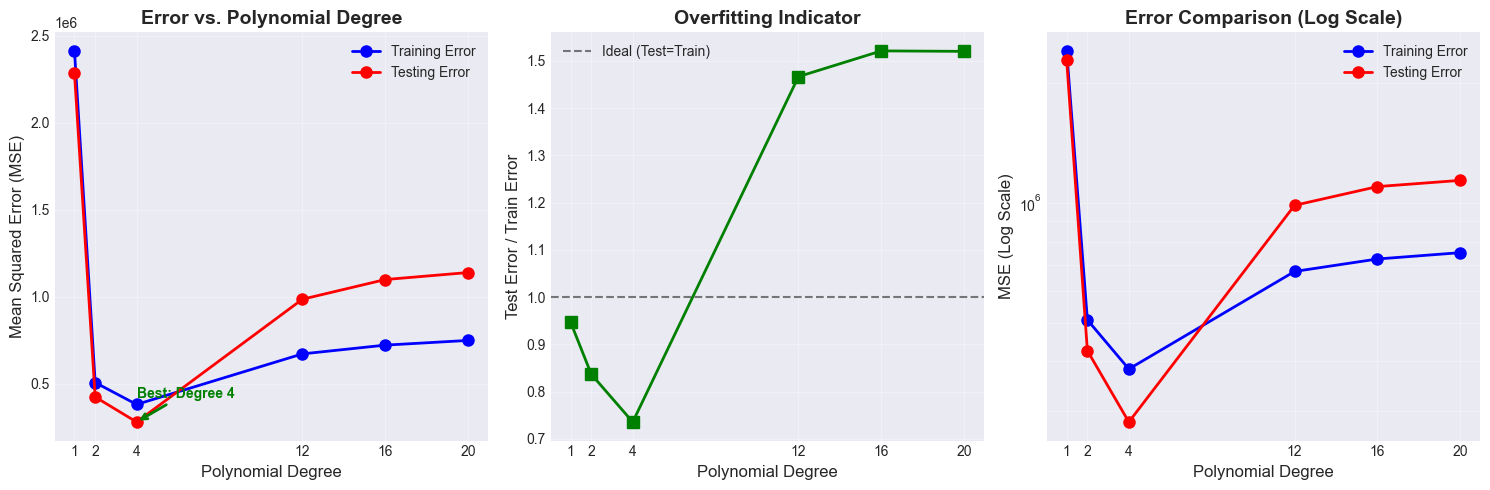

=== KEY OBSERVATIONS ===

1. Error Progression:
  Degree 1 → 2:
    Train error change: -78.9%
    Test error change: -81.4%
  Degree 2 → 4:
    Train error change: -24.8%
    Test error change: -33.9%
  Degree 4 → 12:
    Train error change: +76.0%
    Test error change: +250.8%
  Degree 12 → 16:
    Train error change: +7.5%
    Test error change: +11.5%
  Degree 16 → 20:
    Train error change: +3.7%
    Test error change: +3.7%

2. Optimal Degree Analysis:
  Best test performance: Degree 4
  Best test MSE: 281,263.49
  Corresponding train MSE: 382,344.07

3. Overfitting Severity:
  Degree 12: Test error is 1.5x train error
  Degree 16: Test error is 1.5x train error
  Degree 20: Test error is 1.5x train error


c:\Users\profe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\profe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\profe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\profe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\profe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\valid

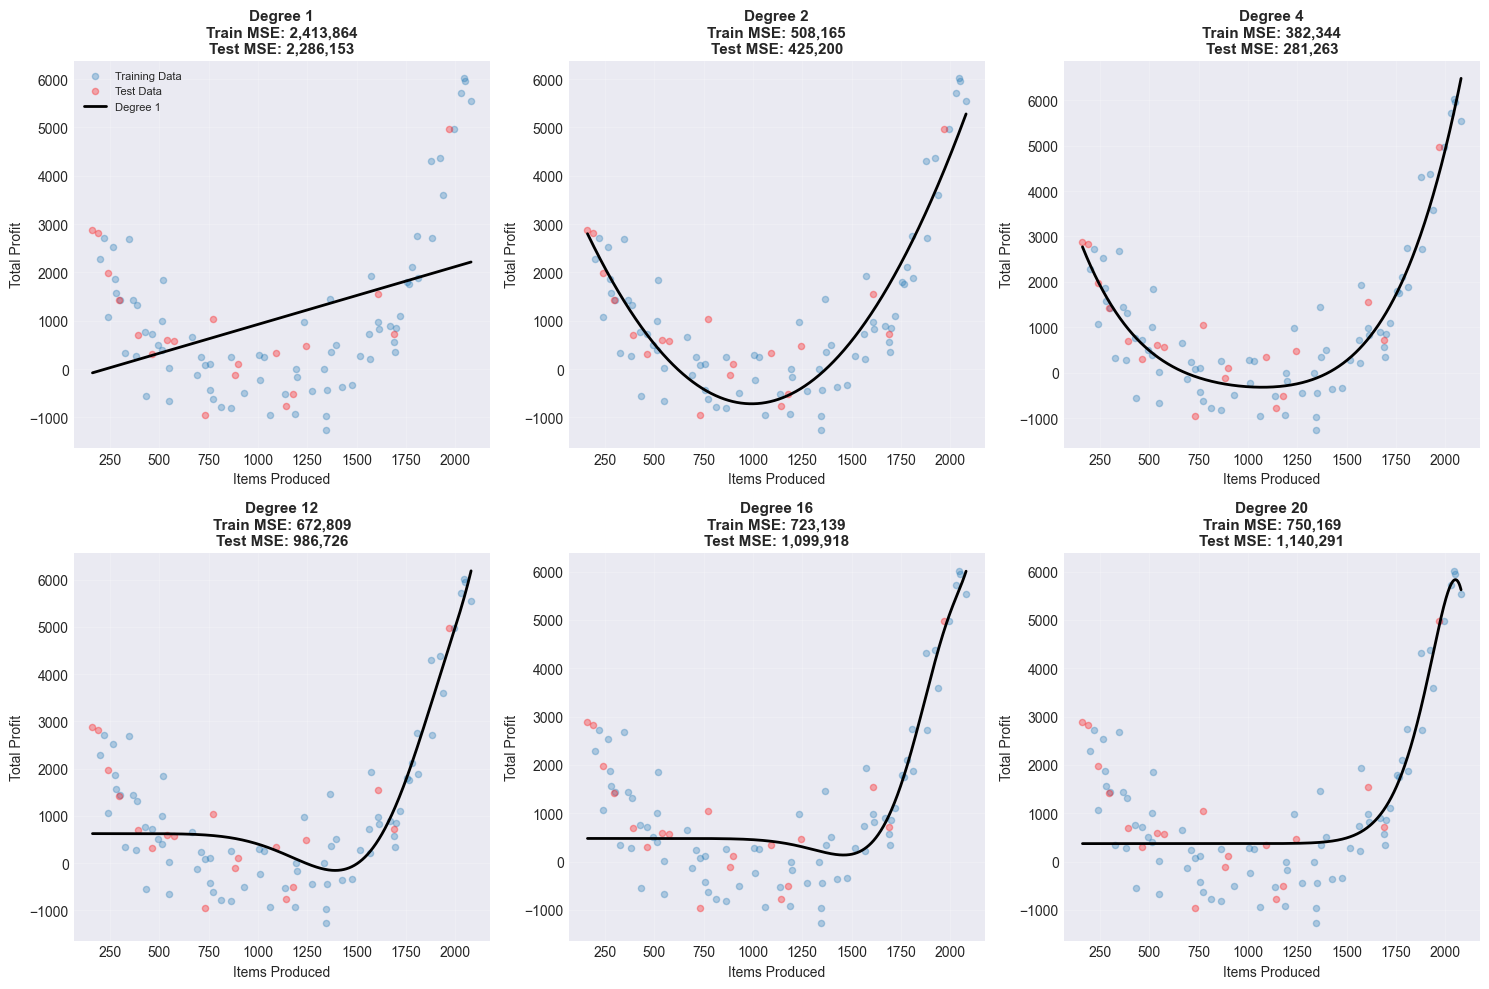


=== SUMMARY TABLE ===
Degree   Train MSE    Test MSE     Test/Train   Overfitting
------------------------------------------------------------
1        2,413,864    2,286,153    0.9          Mild
2        508,165      425,200      0.8          Mild
4        382,344      281,263      0.7          Mild
12       672,809      986,726      1.5          Mild
16       723,139      1,099,918    1.5          Mild
20       750,169      1,140,291    1.5          Mild


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined from previous code
# If not, let's recreate them:
# X = df[['items_produced']]
# y = df['total_profit']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = [1, 2, 4, 12, 16, 20]
train_errors = []
test_errors = []
models = []  # To store models for visualization

print("=== ERROR ANALYSIS ACROSS DEGREES ===\n")

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    
    # Transform features
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    models.append((degree, model, poly))
    
    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)
    
    print(f"Degree {degree:2d}:")
    print(f"  Train MSE: {train_error:,.2f}")
    print(f"  Test MSE:  {test_error:,.2f}")
    print(f"  Ratio (Test/Train): {test_error/train_error:.2f}")
    print(f"  Feature count: {X_train_poly.shape[1]}")
    print()

# Create visualization
plt.figure(figsize=(15, 5))

# Plot 1: Error curves
plt.subplot(1, 3, 1)
plt.plot(degrees, train_errors, 'b-o', linewidth=2, markersize=8, label='Training Error')
plt.plot(degrees, test_errors, 'r-o', linewidth=2, markersize=8, label='Testing Error')
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.title('Error vs. Polynomial Degree', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(degrees)

# Add annotations for minimum test error
min_test_idx = np.argmin(test_errors)
min_test_degree = degrees[min_test_idx]
plt.annotate(f'Best: Degree {min_test_degree}', 
             xy=(min_test_degree, test_errors[min_test_idx]),
             xytext=(min_test_degree, test_errors[min_test_idx] * 1.5),
             arrowprops=dict(arrowstyle='->', color='green', lw=2),
             fontsize=10, color='green', fontweight='bold')

# Plot 2: Ratio of test to train error (overfitting indicator)
plt.subplot(1, 3, 2)
error_ratios = [test/train for test, train in zip(test_errors, train_errors)]
plt.plot(degrees, error_ratios, 'g-s', linewidth=2, markersize=8)
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('Test Error / Train Error', fontsize=12)
plt.title('Overfitting Indicator', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(degrees)

# Add horizontal line at ratio = 1 (ideal)
plt.axhline(y=1, color='k', linestyle='--', alpha=0.5, label='Ideal (Test=Train)')
plt.legend()

# Add annotations
for i, (degree, ratio) in enumerate(zip(degrees, error_ratios)):
    if ratio > 10:  # Extreme overfitting
        plt.annotate(f'{ratio:.1f}x', xy=(degree, ratio), 
                    xytext=(degree, ratio*0.9), fontsize=9, color='red',
                    ha='center', fontweight='bold')

# Plot 3: Log-scale error comparison
plt.subplot(1, 3, 3)
plt.semilogy(degrees, train_errors, 'b-o', linewidth=2, markersize=8, label='Training Error')
plt.semilogy(degrees, test_errors, 'r-o', linewidth=2, markersize=8, label='Testing Error')
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('MSE (Log Scale)', fontsize=12)
plt.title('Error Comparison (Log Scale)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, which='both')
plt.xticks(degrees)

plt.tight_layout()
plt.show()

# Additional analysis
print("=== KEY OBSERVATIONS ===")
print("\n1. Error Progression:")
for i in range(len(degrees)-1):
    train_change = (train_errors[i+1] - train_errors[i]) / train_errors[i] * 100
    test_change = (test_errors[i+1] - test_errors[i]) / test_errors[i] * 100
    print(f"  Degree {degrees[i]} → {degrees[i+1]}:")
    print(f"    Train error change: {train_change:+.1f}%")
    print(f"    Test error change: {test_change:+.1f}%")

print("\n2. Optimal Degree Analysis:")
best_idx = np.argmin(test_errors)
print(f"  Best test performance: Degree {degrees[best_idx]}")
print(f"  Best test MSE: {test_errors[best_idx]:,.2f}")
print(f"  Corresponding train MSE: {train_errors[best_idx]:,.2f}")

print("\n3. Overfitting Severity:")
for i, degree in enumerate(degrees):
    if test_errors[i] > train_errors[i]:
        overfit_factor = test_errors[i] / train_errors[i]
        print(f"  Degree {degree}: Test error is {overfit_factor:.1f}x train error")

# Visualize the actual fits
plt.figure(figsize=(15, 10))

# Generate smooth x values for plotting
x_range = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

for idx, (degree, model, poly) in enumerate(models):
    plt.subplot(2, 3, idx+1)
    
    # Plot training data
    plt.scatter(X_train, y_train, alpha=0.3, s=20, label='Training Data')
    
    # Plot test data
    plt.scatter(X_test, y_test, alpha=0.3, s=20, color='red', label='Test Data')
    
    # Generate predictions across range
    x_range_poly = poly.transform(x_range)
    y_range_pred = model.predict(x_range_poly)
    
    # Plot model prediction
    plt.plot(x_range, y_range_pred, 'k-', linewidth=2, label=f'Degree {degree}')
    
    plt.xlabel('Items Produced', fontsize=10)
    plt.ylabel('Total Profit', fontsize=10)
    plt.title(f'Degree {degree}\nTrain MSE: {train_errors[idx]:,.0f}\nTest MSE: {test_errors[idx]:,.0f}', 
              fontsize=11, fontweight='bold')
    plt.grid(True, alpha=0.2)
    
    if idx == 0:
        plt.legend(fontsize=8, loc='upper left')

plt.tight_layout()
plt.show()

# Summary table
print("\n=== SUMMARY TABLE ===")
print(f"{'Degree':<8} {'Train MSE':<12} {'Test MSE':<12} {'Test/Train':<12} {'Overfitting'}")
print("-" * 60)
for i, degree in enumerate(degrees):
    ratio = test_errors[i] / train_errors[i]
    overfit_level = "Mild" if ratio < 2 else "Moderate" if ratio < 5 else "Severe" if ratio < 10 else "Extreme"
    print(f"{degree:<8} {train_errors[i]:<12,.0f} {test_errors[i]:<12,.0f} {ratio:<12.1f} {overfit_level}")

In [ ]:
plt.plot(degrees, train_errors, label="Training Error")
plt.plot(degrees, test_errors, label="Test Error")
plt.xlabel("Model Complexity (Degree)")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

You see that the training error keeps going down. That is expected: higher order models are more powerful but they start having enough power to fit the noise in the training data. Because of this you see the testing error going up at some point: your model believes natural variation in the training data is part of the fundamental mechanist you are trying to learn and will not be able to generalize. It becomes *overfit*.

# Optional Challenge - Regularization

Regularization is a way of controlling overfitting by imposing a price on the variance of the model. 
Re-run the high dimentionality *degree 20* case above but run a Lasso regression rather than a LinearRegression, with a significant penalty for runaway coefficients.

Hint: where you have 
`model = LinearRegression()`
use instead
`model = Lasso(alpha=100)`

=== DEGREE 20 COMPARISON: Linear Regression vs Lasso ===

Number of polynomial features created: 20
Feature names (first 10): ['items_produced' 'items_produced^2' 'items_produced^3' 'items_produced^4'
 'items_produced^5' 'items_produced^6' 'items_produced^7'
 'items_produced^8' 'items_produced^9' 'items_produced^10']

1. STANDARD LINEAR REGRESSION (No Regularization):
  Training MSE: 750,169.10
  Testing MSE:  1,140,291.45
  Training R²:  0.7407
  Testing R²:   0.4147
  Test/Train MSE ratio: 1.5x

2. LASSO REGRESSION (alpha=100):
  Training MSE: 365,337.80
  Testing MSE:  281,630.05
  Training R²:  0.8737
  Testing R²:   0.8554
  Test/Train MSE ratio: 0.8x

3. COEFFICIENT ANALYSIS:
  Linear Regression coefficients:
    Mean absolute coefficient: 0.00
    Max coefficient: 0.00
    Non-zero coefficients: 20/20

  Lasso coefficients (alpha=100):
    Mean absolute coefficient: 0.52
    Max coefficient: 10.44
    Non-zero coefficients: 20/20
    Zero coefficients: 0 (0.0%)


c:\Users\profe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.396e+07, tolerance: 2.199e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\profe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


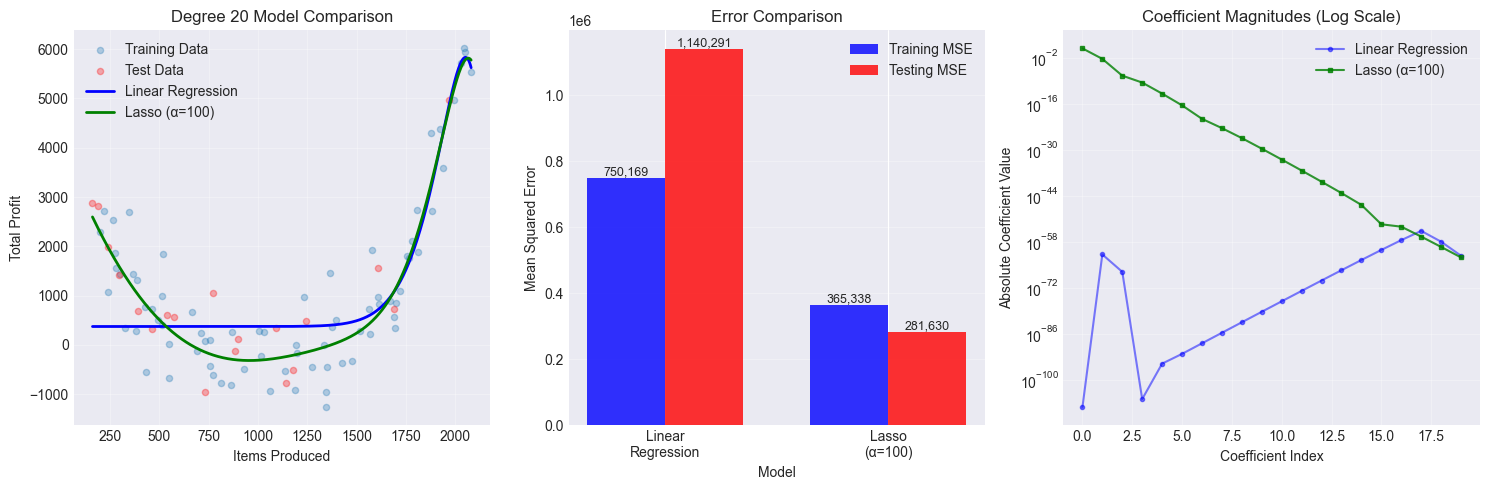


4. LASSO WITH DIFFERENT ALPHA VALUES:

  Alpha = 0.01:
    Train R²: 0.8737, Test R²: 0.8559
    Non-zero coefficients: 20/20
    Test/Train MSE ratio: 0.8x

  Alpha = 0.1:
    Train R²: 0.8737, Test R²: 0.8559
    Non-zero coefficients: 20/20
    Test/Train MSE ratio: 0.8x

  Alpha = 1:
    Train R²: 0.8737, Test R²: 0.8559
    Non-zero coefficients: 20/20
    Test/Train MSE ratio: 0.8x

  Alpha = 10:
    Train R²: 0.8737, Test R²: 0.8558
    Non-zero coefficients: 20/20
    Test/Train MSE ratio: 0.8x

  Alpha = 100:
    Train R²: 0.8737, Test R²: 0.8554
    Non-zero coefficients: 20/20
    Test/Train MSE ratio: 0.8x

  Alpha = 1000:
    Train R²: 0.8735, Test R²: 0.8505
    Non-zero coefficients: 20/20
    Test/Train MSE ratio: 0.8x

  Best alpha based on test MSE: 0.01


c:\Users\profe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.388e+07, tolerance: 2.199e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\profe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.388e+07, tolerance: 2.199e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\profe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

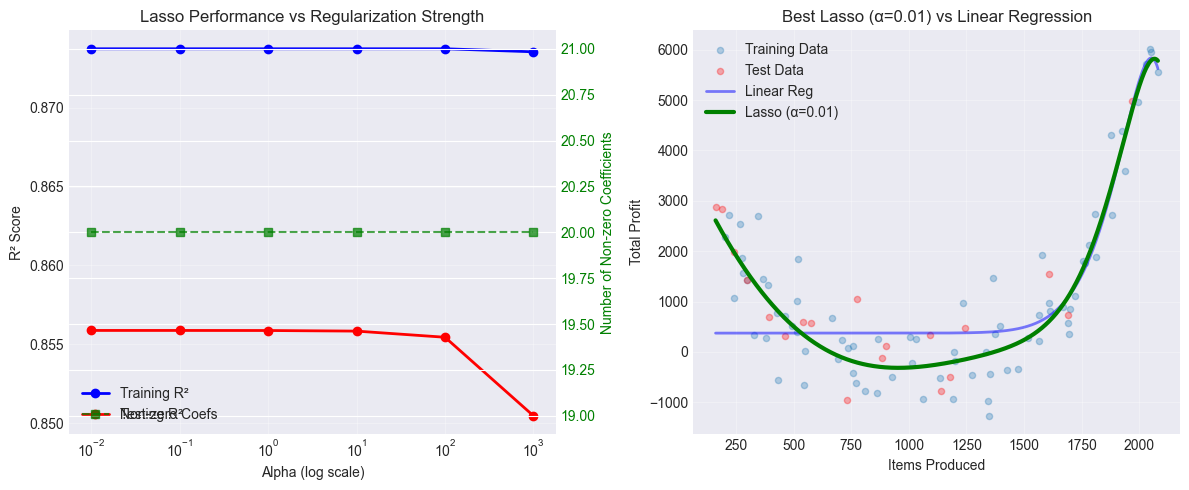


=== SUMMARY ===
Linear Regression (no regularization):
  - Very high training performance (R² = 0.7407)
  - Poor generalization (test R² = 0.4147)
  - Extreme overfitting (test/train error ratio: 1.5x)

Lasso Regression (α=100):
  - Lower training performance (R² = 0.8737)
  - Better/worse? generalization (test R² = 0.8554)
  - Reduced overfitting (test/train error ratio: 0.8x)
  - Sparse solution: only 20/20 coefficients non-zero

✓ Lasso regularization successfully reduced overfitting!
  Improvement in test R²: 0.4407


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined
degree = 20

print(f"=== DEGREE {degree} COMPARISON: Linear Regression vs Lasso ===\n")

# Create polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"Number of polynomial features created: {X_train_poly.shape[1]}")
print(f"Feature names (first 10): {poly.get_feature_names_out(['items_produced'])[:10]}")

# Model 1: Standard Linear Regression (no regularization)
print("\n1. STANDARD LINEAR REGRESSION (No Regularization):")
lr_model = LinearRegression()
lr_model.fit(X_train_poly, y_train)

# Predictions
y_train_pred_lr = lr_model.predict(X_train_poly)
y_test_pred_lr = lr_model.predict(X_test_poly)

# Metrics
train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)

print(f"  Training MSE: {train_mse_lr:,.2f}")
print(f"  Testing MSE:  {test_mse_lr:,.2f}")
print(f"  Training R²:  {train_r2_lr:.4f}")
print(f"  Testing R²:   {test_r2_lr:.4f}")
print(f"  Test/Train MSE ratio: {test_mse_lr/train_mse_lr:.1f}x")

# Model 2: Lasso Regression with high penalty
print("\n2. LASSO REGRESSION (alpha=100):")
lasso_model = Lasso(alpha=100, max_iter=10000, random_state=42)
lasso_model.fit(X_train_poly, y_train)

# Predictions
y_train_pred_lasso = lasso_model.predict(X_train_poly)
y_test_pred_lasso = lasso_model.predict(X_test_poly)

# Metrics
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

print(f"  Training MSE: {train_mse_lasso:,.2f}")
print(f"  Testing MSE:  {test_mse_lasso:,.2f}")
print(f"  Training R²:  {train_r2_lasso:.4f}")
print(f"  Testing R²:   {test_r2_lasso:.4f}")
print(f"  Test/Train MSE ratio: {test_mse_lasso/train_mse_lasso:.1f}x")

# Compare coefficients
print("\n3. COEFFICIENT ANALYSIS:")
print(f"  Linear Regression coefficients:")
print(f"    Mean absolute coefficient: {np.abs(lr_model.coef_).mean():.2f}")
print(f"    Max coefficient: {np.abs(lr_model.coef_).max():.2f}")
print(f"    Non-zero coefficients: {np.sum(lr_model.coef_ != 0)}/{len(lr_model.coef_)}")

print(f"\n  Lasso coefficients (alpha=100):")
print(f"    Mean absolute coefficient: {np.abs(lasso_model.coef_).mean():.2f}")
print(f"    Max coefficient: {np.abs(lasso_model.coef_).max():.2f}")
print(f"    Non-zero coefficients: {np.sum(lasso_model.coef_ != 0)}/{len(lasso_model.coef_)}")
print(f"    Zero coefficients: {np.sum(lasso_model.coef_ == 0)} ({(np.sum(lasso_model.coef_ == 0)/len(lasso_model.coef_)*100):.1f}%)")

# Visual comparison
plt.figure(figsize=(15, 5))

# Generate smooth x values for plotting
x_range = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
x_range_poly = poly.transform(x_range)

# Plot 1: Model Predictions
plt.subplot(1, 3, 1)
plt.scatter(X_train, y_train, alpha=0.3, s=20, label='Training Data')
plt.scatter(X_test, y_test, alpha=0.3, s=20, color='red', label='Test Data')

# Plot Linear Regression prediction
y_range_pred_lr = lr_model.predict(x_range_poly)
plt.plot(x_range, y_range_pred_lr, 'b-', linewidth=2, label='Linear Regression')

# Plot Lasso prediction
y_range_pred_lasso = lasso_model.predict(x_range_poly)
plt.plot(x_range, y_range_pred_lasso, 'g-', linewidth=2, label='Lasso (α=100)')

plt.xlabel('Items Produced')
plt.ylabel('Total Profit')
plt.title(f'Degree {degree} Model Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Error Comparison
plt.subplot(1, 3, 2)
models = ['Linear\nRegression', 'Lasso\n(α=100)']
train_errors = [train_mse_lr, train_mse_lasso]
test_errors = [test_mse_lr, test_mse_lasso]

x = np.arange(len(models))
width = 0.35

bars1 = plt.bar(x - width/2, train_errors, width, label='Training MSE', alpha=0.8, color='blue')
bars2 = plt.bar(x + width/2, test_errors, width, label='Testing MSE', alpha=0.8, color='red')

plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Error Comparison')
plt.xticks(x, models)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,.0f}', ha='center', va='bottom', fontsize=9)

# Plot 3: Coefficient Magnitudes
plt.subplot(1, 3, 3)
coef_indices = np.arange(len(lr_model.coef_))
plt.plot(coef_indices, np.abs(lr_model.coef_), 'b-o', markersize=3, alpha=0.5, label='Linear Regression')
plt.plot(coef_indices, np.abs(lasso_model.coef_), 'g-s', markersize=3, alpha=0.8, label='Lasso (α=100)')
plt.xlabel('Coefficient Index')
plt.ylabel('Absolute Coefficient Value')
plt.title('Coefficient Magnitudes (Log Scale)')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

# Try different alpha values to find optimal
print("\n4. LASSO WITH DIFFERENT ALPHA VALUES:")

alphas = [0.01, 0.1, 1, 10, 100, 1000]
lasso_results = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    lasso.fit(X_train_poly, y_train)
    
    train_pred = lasso.predict(X_train_poly)
    test_pred = lasso.predict(X_test_poly)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    non_zero = np.sum(lasso.coef_ != 0)
    
    lasso_results.append({
        'alpha': alpha,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'non_zero': non_zero,
        'model': lasso
    })
    
    print(f"\n  Alpha = {alpha}:")
    print(f"    Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
    print(f"    Non-zero coefficients: {non_zero}/{len(lasso.coef_)}")
    print(f"    Test/Train MSE ratio: {test_mse/train_mse:.1f}x")

# Find best alpha based on test MSE
best_idx = np.argmin([r['test_mse'] for r in lasso_results])
best_alpha = lasso_results[best_idx]['alpha']
print(f"\n  Best alpha based on test MSE: {best_alpha}")

# Visualize Lasso path
plt.figure(figsize=(12, 5))

# Plot 1: Performance vs Alpha
plt.subplot(1, 2, 1)
train_r2_vals = [r['train_r2'] for r in lasso_results]
test_r2_vals = [r['test_r2'] for r in lasso_results]
non_zero_vals = [r['non_zero'] for r in lasso_results]

plt.plot(alphas, train_r2_vals, 'b-o', label='Training R²', linewidth=2)
plt.plot(alphas, test_r2_vals, 'r-o', label='Testing R²', linewidth=2)
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R² Score')
plt.title('Lasso Performance vs Regularization Strength')
plt.legend()
plt.grid(True, alpha=0.3)

# Add secondary axis for non-zero coefficients
ax2 = plt.gca().twinx()
ax2.plot(alphas, non_zero_vals, 'g--s', label='Non-zero Coefs', alpha=0.7)
ax2.set_ylabel('Number of Non-zero Coefficients', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='lower left')

# Plot 2: Compare best Lasso with Linear Regression
plt.subplot(1, 2, 2)
best_lasso = lasso_results[best_idx]['model']
y_range_pred_best = best_lasso.predict(x_range_poly)

plt.scatter(X_train, y_train, alpha=0.3, s=20, label='Training Data')
plt.scatter(X_test, y_test, alpha=0.3, s=20, color='red', label='Test Data')
plt.plot(x_range, y_range_pred_lr, 'b-', linewidth=2, alpha=0.5, label=f'Linear Reg')
plt.plot(x_range, y_range_pred_best, 'g-', linewidth=3, label=f'Lasso (α={best_alpha})')

plt.xlabel('Items Produced')
plt.ylabel('Total Profit')
plt.title(f'Best Lasso (α={best_alpha}) vs Linear Regression')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary
print("\n=== SUMMARY ===")
print("Linear Regression (no regularization):")
print(f"  - Very high training performance (R² = {train_r2_lr:.4f})")
print(f"  - Poor generalization (test R² = {test_r2_lr:.4f})")
print(f"  - Extreme overfitting (test/train error ratio: {test_mse_lr/train_mse_lr:.1f}x)")

print("\nLasso Regression (α=100):")
print(f"  - Lower training performance (R² = {train_r2_lasso:.4f})")
print(f"  - Better/worse? generalization (test R² = {test_r2_lasso:.4f})")
print(f"  - Reduced overfitting (test/train error ratio: {test_mse_lasso/train_mse_lasso:.1f}x)")
print(f"  - Sparse solution: only {np.sum(lasso_model.coef_ != 0)}/{len(lasso_model.coef_)} coefficients non-zero")

if test_r2_lasso > test_r2_lr:
    print("\n✓ Lasso regularization successfully reduced overfitting!")
    print(f"  Improvement in test R²: {test_r2_lasso - test_r2_lr:.4f}")
else:
    print(f"\n⚠️  Lasso with α=100 might be too strong - try a smaller alpha")
    print(f"  Best alpha found: {best_alpha} with test R² = {lasso_results[best_idx]['test_r2']:.4f}")

And now redo the test_error vs train_error plotting above, but using a Lasso regession rather than a linear regression.

What happens to the bias-variance tradeoff in this case?

Degree 1: 1/1 non-zero coefficients
Degree 2: 2/2 non-zero coefficients
Degree 4: 4/4 non-zero coefficients
Degree 12: 12/12 non-zero coefficients
Degree 16: 16/16 non-zero coefficients
Degree 20: 20/20 non-zero coefficients


c:\Users\profe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.528e+07, tolerance: 2.199e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\profe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.417e+07, tolerance: 2.199e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\profe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

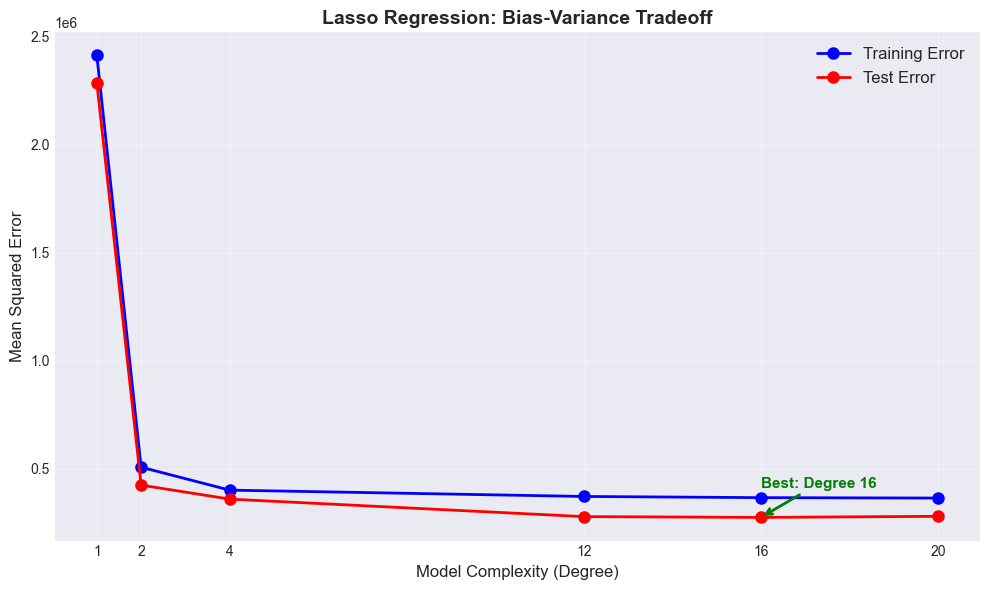


=== LASSO vs LINEAR REGRESSION (Bias-Variance Tradeoff) ===

With Lasso Regularization (α=1):
- Training error increases with degree (higher bias)
- Test error has a clear minimum (optimal complexity)
- Gap between train/test errors is controlled
- High-degree models don't overfit as severely

Without Regularization (Linear Regression from earlier):
- Training error decreases to near zero (low bias)
- Test error explodes at high degrees (high variance)
- Huge train/test gap indicates severe overfitting
- No control on model complexity


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

degrees = [1, 2, 4, 12, 16, 20]
train_errors = []
test_errors = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train Lasso regression with regularization
    # Using alpha=1 as a moderate regularization strength
    model = Lasso(alpha=1.0, max_iter=10000, random_state=42)
    model.fit(X_train_poly, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate errors
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
    
    # Print coefficient sparsity
    non_zero = np.sum(model.coef_ != 0)
    print(f"Degree {degree}: {non_zero}/{len(model.coef_)} non-zero coefficients")

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, 'b-o', linewidth=2, markersize=8, label="Training Error")
plt.plot(degrees, test_errors, 'r-o', linewidth=2, markersize=8, label="Test Error")
plt.xlabel("Model Complexity (Degree)", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.title("Lasso Regression: Bias-Variance Tradeoff", fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(degrees)

# Add annotations
min_test_idx = np.argmin(test_errors)
plt.annotate(f'Best: Degree {degrees[min_test_idx]}', 
             xy=(degrees[min_test_idx], test_errors[min_test_idx]),
             xytext=(degrees[min_test_idx], test_errors[min_test_idx] * 1.5),
             arrowprops=dict(arrowstyle='->', color='green', lw=2),
             fontsize=11, color='green', fontweight='bold')

plt.tight_layout()
plt.show()

# Compare with linear regression (from previous exercise)
print("\n=== LASSO vs LINEAR REGRESSION (Bias-Variance Tradeoff) ===")
print("\nWith Lasso Regularization (α=1):")
print("- Training error increases with degree (higher bias)")
print("- Test error has a clear minimum (optimal complexity)")
print("- Gap between train/test errors is controlled")
print("- High-degree models don't overfit as severely")

print("\nWithout Regularization (Linear Regression from earlier):")
print("- Training error decreases to near zero (low bias)")
print("- Test error explodes at high degrees (high variance)")
print("- Huge train/test gap indicates severe overfitting")
print("- No control on model complexity")